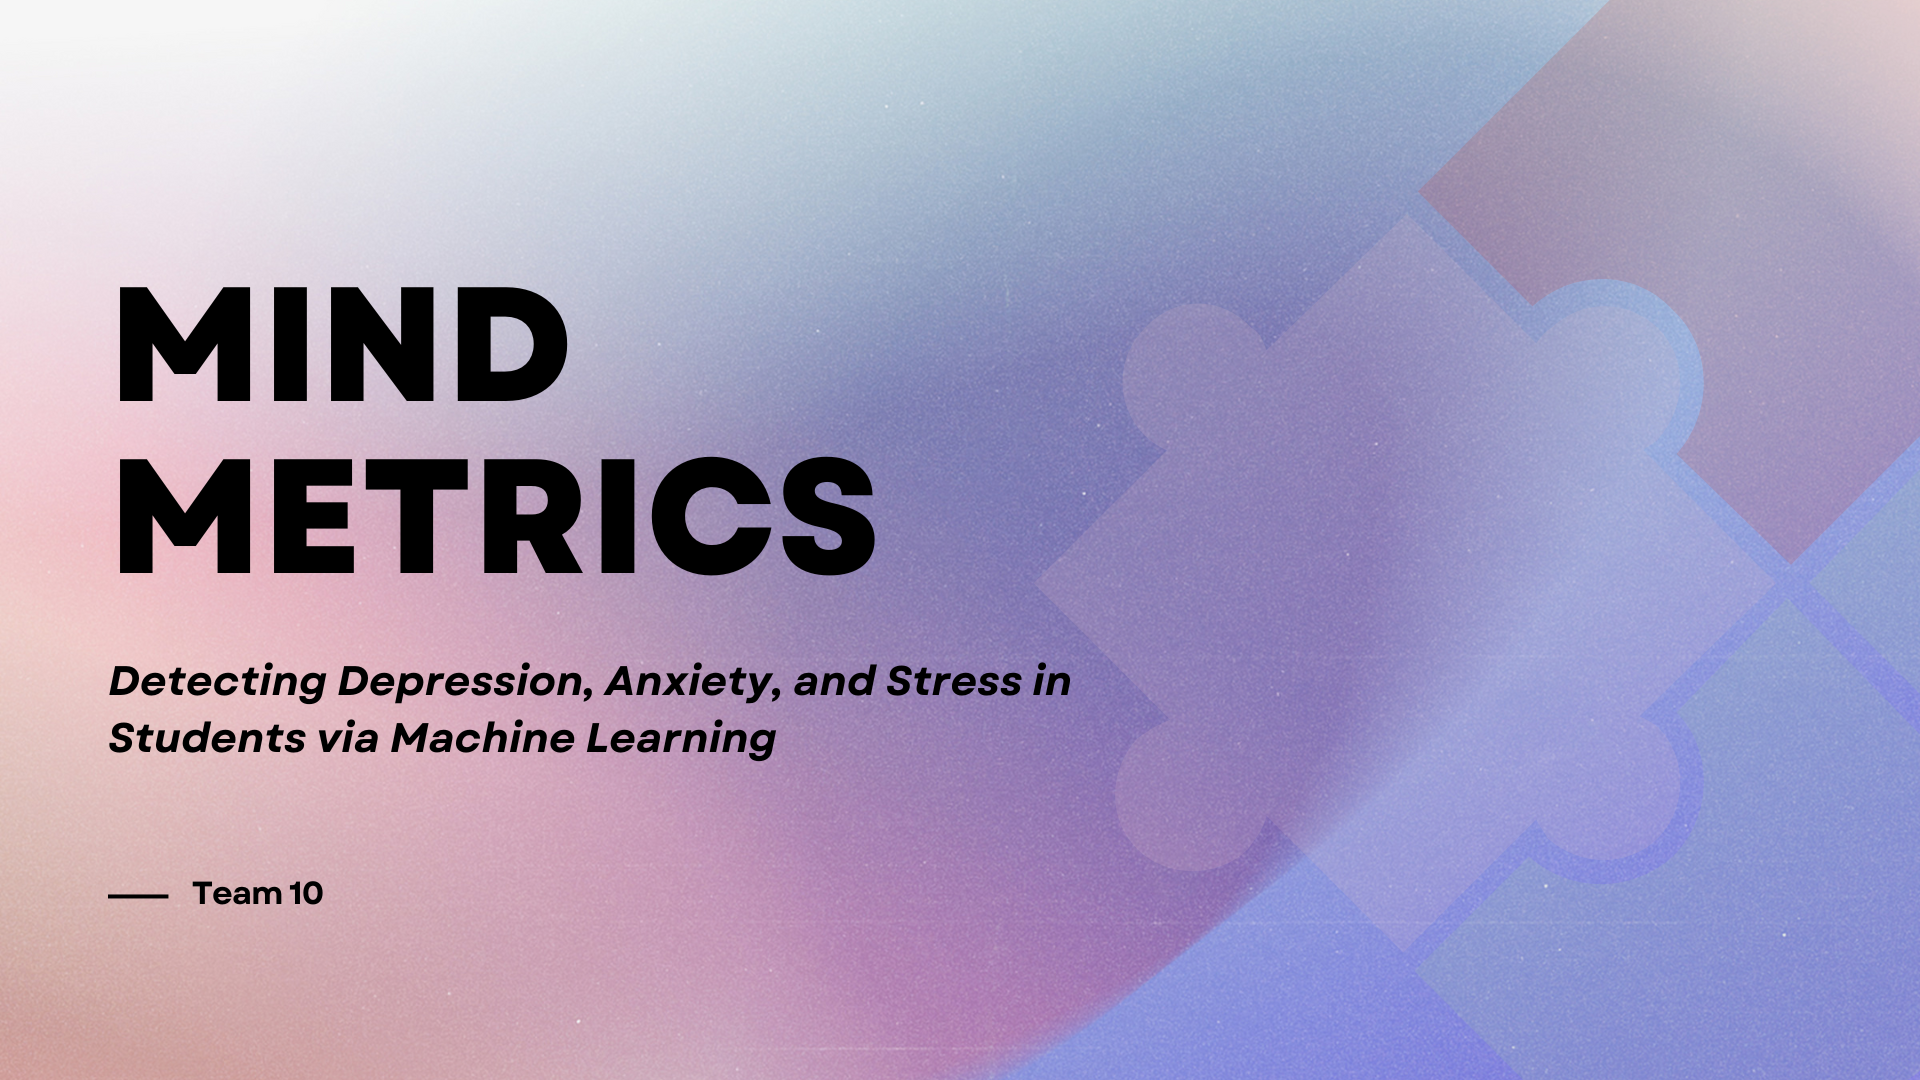

# 📚 Machine Learning Project: Mental Health Prediction

## 📑 Table of Contents

### 1️⃣ **Data Preparation**
1. **Import All Libraries**  
   - Essential packages for data processing and modeling
2. **Load Dataset and Basic Preprocessing**  
   - Data loading, cleaning, and initial exploration
3. **Create Features and Targets**  
   - Feature engineering and target variable definition
4. **Normalize the Features**  
   - Standardization/Scaling of numerical features
5. **Train-Test Split**  
   - Data partitioning for model validation

### 2️⃣ **Feature Selection & Modeling**
6. **Feature Selection with SelectKBest**  
   - Identifying most important features
7. **All Models Implementation**  
   - MultiOutput Regression with:
     - `AdaBoostRegressor`
     - `XGBRegressor`
     - `CatBoostRegressor`
     - `RandomForestRegressor`
     - `LogisticRegression`
     - `DecisionTreeRegressor`
     - `GradientBoostingRegressor`
     - `LGBMRegressor`

### 3️⃣ **Model Optimization**
8. **Grid Search**  
   - Hyperparameter tuning for optimal performance
9. **Train Models and Collect Metrics**  
   - Comprehensive evaluation of all models

### 4️⃣ **Results & Evaluation**
10. **Performance Metrics**
    - 10.1 **Score Table for Depression, Stress, Anxiety**  
      (MSE, R², Accuracy)
    - 10.2 **Comprehensive Score Table**  
      (Model, Target, MAE, MSE, R², Accuracy, Recall, F1, AUC, K-fold Mean)
11. **Calculate Average Metrics**  
    - F1 Score, Accuracy, AUC for each Model
12. **Visual Comparisons**
    - 12.1 **F1 Score Bar Plot** 📊
    - 12.2 **Accuracy Bar Plot** 📈  
    - 12.3 **AUC Bar Plot** 📉

### 5️⃣ **Final Analysis & Deployment**
13. **Model Validation**
    - 13.1 **Average Accuracy (%) vs K-Fold (%)**  
    - 13.2 **Line Plot**: Accuracy vs K-Fold Comparison
14. **Saving Artifacts**  
    - Exporting Model, Scaler, and Feature Selector

 # 1. Import All Libraries:

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# --- Basics Liberies for ---
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For making statistical graphics

# --- Model Building and Evaluation ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report, roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# --- Performing hyperparameter tuning  ---
from sklearn.model_selection import GridSearchCV

# --- For Performing f_regression ---
from sklearn.feature_selection import f_regression

# --- Machine Learning Models ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor

# --- Advanced Gradient Boosting Models ---
from catboost import CatBoostClassifier,CatBoostRegressor
from xgboost import XGBClassifier,XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# --- Model Persistence ---
from joblib import dump
import pandas as pd

# 2. Load Dataset and Basic Preprocessing

In [ ]:
df = pd.read_csv("main-2.csv")
df.dropna(inplace=True)

## Here we applies 'Label Encoding' to convert these categorical features into numerical representations.

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
print(df.isnull().sum())

Age                            0
Course                         0
Gender                         0
CGPA                           0
Stress_Level                   0
Depression_Score               0
Anxiety_Score                  0
Sleep_Quality                  0
Physical_Activity              0
Diet_Quality                   0
Social_Support                 0
Relationship_Status            0
Substance_Use                  0
Counseling_Service_Use         0
Family_History                 0
Chronic_Illness                0
Financial_Stress               0
Extracurricular_Involvement    0
Semester_Credit_Load           0
Residence_Type                 0
dtype: int64


# 3. Create Features and Targets

### Here we defines the target variables y as a DataFrame containing all 3 variables.

In [ ]:
y = df[['Depression_Score', 'Stress_Level', 'Anxiety_Score']]

### Here we creates the feature matrix X by dropping the target variable columns from the original DataFrame.

In [ ]:
X = df.drop(columns=['Depression_Score', 'Stress_Level', 'Anxiety_Score'])

# 4. Normalize the Features

### Now we use 'StandardScaler' to normalize the features.
### First we fits the scaler to the feature matrix X and transforms it, then storing the scaled features in X_scaled.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###  Here we check NaN values in target variables.

In [ ]:
print(y_train.isna().sum())

Depression_Score    0
Stress_Level        0
Anxiety_Score       0
dtype: int64


 # 5. Train-Test Split

### We allocates 80% of the data for training and 20% for testing, with a random_state=62 for reproducibility.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=62)

# 6. Feature Selection with SelectKBest

In [ ]:
# Here we use original training data (X_train, y_train) to select the top 17 features most relevant to 'Depression_Score':
selector = SelectKBest(score_func=f_regression, k=17)
X_train_sel = selector.fit_transform(X_train, y_train['Depression_Score'])
X_test_sel = selector.transform(X_test)

# Now we get feature names before converting to numpy array:
selected_features = X.columns[selector.get_support()]

# Then convert back to DataFrame with feature names:
X_train_sel = pd.DataFrame(X_train_sel, columns=selected_features)
X_test_sel = pd.DataFrame(X_test_sel, columns=selected_features)

# Finally we show our Selected Features:
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Course', 'Gender', 'CGPA', 'Sleep_Quality', 'Physical_Activity',
       'Diet_Quality', 'Social_Support', 'Relationship_Status',
       'Substance_Use', 'Counseling_Service_Use', 'Family_History',
       'Chronic_Illness', 'Financial_Stress', 'Extracurricular_Involvement',
       'Semester_Credit_Load', 'Residence_Type'],
      dtype='object')


# 7. All Models [MultiOutput(AdaBoostRegressor, XGBRegressor, CatBoostRegressor, RandomForestRegressor, Logistic Regression, DecisionTreeRegressor, GradientBoostingRegressor, LGBMRegressor)]

In [ ]:
# All Models: • MultiOutputRegressor  (AdaBoostRegressor, XGBRegressor, CatBoostRegressor, RandomForestRegressor, DecisionTreeRegressor,
#                                     GradientBoostingRegressor, and LGBMRegressor.)
#             • MultiOutputClassifier (Logistic Regression)

models = {
    'MultiOutput (AdaBoostRegressor)': MultiOutputRegressor(AdaBoostRegressor()),
    'MultiOutput (XGBRegressor)': MultiOutputRegressor(XGBRegressor()),
    'MultiOutput (CatBoostRegressor)': MultiOutputRegressor(CatBoostRegressor(verbose=0)),
    'MultiOutput (RandomForestRegressor)': MultiOutputRegressor(RandomForestRegressor()),
    'MultiOutput (Logistic Regression)': MultiOutputClassifier(LogisticRegression()),
    'MultiOutput (DecisionTreeRegressor)': MultiOutputRegressor(DecisionTreeRegressor()),
    'MultiOutput (GradientBoostingRegressor)':MultiOutputRegressor(GradientBoostingRegressor()),
    'MultiOutput (LGBMRegressor)':MultiOutputRegressor(LGBMRegressor(random_state=42))

}

# 8. Grid Search

### Here we use 'GridSearchCV' to fine-tune hyperparameters for each model, for maximize predictive performance.

In [ ]:
# Here we define parameter grids for each model type:
param_grids = {
    'MultiOutput (AdaBoostRegressor)': {
        'estimator__n_estimators': [50, 100, 200],
        'estimator__learning_rate': [0.01, 0.1, 1.0],
        'estimator__loss': ['linear', 'square', 'exponential']
    },
    'MultiOutput (XGBRegressor)': {
        'estimator__n_estimators': [50, 100, 200],
        'estimator__learning_rate': [0.01, 0.1, 0.3],
        'estimator__max_depth': [3, 6, 9]
    },
    'MultiOutput (CatBoostRegressor)': {
        'estimator__iterations': [50, 100, 200],
        'estimator__learning_rate': [0.01, 0.1, 0.3],
        'estimator__depth': [4, 6, 8]
    },
    'MultiOutput (RandomForestRegressor)': {
        'estimator__n_estimators': [50, 100, 200],
        'estimator__max_depth': [None, 10, 20],
        'estimator__min_samples_split': [2, 5, 10]
    },
    'MultiOutput (Logistic Regression)': {
        'estimator__C': [0.1, 1.0, 10.0],
        'estimator__penalty': ['l1', 'l2'],
        'estimator__solver': ['liblinear', 'saga']
    },
    'MultiOutput (DecisionTreeRegressor)': {
        'estimator__max_depth': [None, 10, 20],
        'estimator__min_samples_split': [2, 5, 10],
        'estimator__min_samples_leaf': [1, 2, 4]
    },
    'MultiOutput (GradientBoostingRegressor)': {
         'estimator__n_estimators': [50, 100, 200],
        'estimator__learning_rate': [0.01, 0.1, 0.3],
        'estimator__max_depth': [3, 6, 9]
    },
    'MultiOutput (LGBMRegressor)': {
       'estimator__n_estimators': [50, 100, 200],
        'estimator__learning_rate': [0.01, 0.1, 0.3],
        'estimator__max_depth': [3, 6, 9]
    }
}

# Then We Perform Grid Search for each model:
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='r2')
    grid_search.fit(X_train_sel, y_train)

    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best R2 Score: {grid_search.best_score_}")

# Finally we update the model in the 'models' dictionary with the best estimator:
    models[model_name] = grid_search.best_estimator_

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_r

# 9. Train Models and Collect Metrics

In [ ]:
results = {'Depression': [], 'Stress': [], 'Anxiety': []}

for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)

    for i, target in enumerate(['Depression_Score', 'Stress_Level', 'Anxiety_Score']):
    # Here we calculate the regression metrics:
        mse = mean_squared_error(y_test[target], y_pred[:, i])
        r2 = r2_score(y_test[target], y_pred[:, i])

        results[target.split('_')[0].capitalize()].append({
            'Model': name,
            'MSE': mse,
            'R2': r2
        })

        print(f"\n {name} — {target}")
        print("MSE:", round(mse, 4), "R2:", round(r2, 4))


 MultiOutput (AdaBoostRegressor) — Depression_Score
MSE: 2.4708 R2: 0.0686

 MultiOutput (AdaBoostRegressor) — Stress_Level
MSE: 2.3479 R2: 0.1055

 MultiOutput (AdaBoostRegressor) — Anxiety_Score
MSE: 2.4894 R2: 0.0856

 MultiOutput (XGBRegressor) — Depression_Score
MSE: 2.469 R2: 0.0693

 MultiOutput (XGBRegressor) — Stress_Level
MSE: 2.3641 R2: 0.0993

 MultiOutput (XGBRegressor) — Anxiety_Score
MSE: 2.5086 R2: 0.0785

 MultiOutput (CatBoostRegressor) — Depression_Score
MSE: 2.4818 R2: 0.0645

 MultiOutput (CatBoostRegressor) — Stress_Level
MSE: 2.3648 R2: 0.099

 MultiOutput (CatBoostRegressor) — Anxiety_Score
MSE: 2.5125 R2: 0.0771

 MultiOutput (RandomForestRegressor) — Depression_Score
MSE: 2.52 R2: 0.0501

 MultiOutput (RandomForestRegressor) — Stress_Level
MSE: 2.3781 R2: 0.094

 MultiOutput (RandomForestRegressor) — Anxiety_Score
MSE: 2.5368 R2: 0.0682

 MultiOutput (Logistic Regression) — Depression_Score
MSE: 4.5354 R2: -0.7096

 MultiOutput (Logistic Regression) — Stress_

# 10.1. Show Score Table for Depression, Stress and Anxity Performance (MSE, R2, Accuracy)

In [ ]:
results = {'Depression': [], 'Stress': [], 'Anxiety': []}

for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)

    for i, target in enumerate(['Depression_Score', 'Stress_Level', 'Anxiety_Score']):
        # Calculate regression metrics
        mse = mean_squared_error(y_test[target], y_pred[:, i])
        r2 = r2_score(y_test[target], y_pred[:, i])

        # Here we calculate accuracy (we using a threshold for binary classification)
        threshold = 3
        y_pred_binary = (y_pred[:, i] > threshold).astype(int)
        y_true_binary = (y_test[target] > threshold).astype(int)
        acc = accuracy_score(y_true_binary, y_pred_binary)

        results[target.split('_')[0].capitalize()].append({
            'Model': name,
            'MSE': mse,
            'R2': r2,
            'Accuracy': acc
        })

# Final Score Tables:
for target in results:
    print(f"\n===== {target} Performance =====")
    print(pd.DataFrame(results[target]).sort_values(by='R2', ascending=False))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 227
[LightGBM] [Info] Number of data points in the train set: 5596, number of used features: 17
[LightGBM] [Info] Start training from score 2.253931
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

# 10.2. Show Score Table(Model, Target, MAE, MSE, R2, Accuracy, Recall, F1 Score, AUC, K-fold Mean)

In [ ]:
# Here we careate a dictionary to store all metrics:
all_metrics = {
    'Model': [],
    'Target': [],
    'MAE': [],
    'MSE': [],
    'R2': [],
    'Accuracy': [],
    'Recall': [],
    'F1 Score': [],
    'AUC': [],
    'K-fold Scores (R2)': []
}

# Then we define a threshold for binary classification metrics:
threshold = 3

for name, model in models.items():
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)

    for i, target in enumerate(['Depression_Score', 'Stress_Level', 'Anxiety_Score']):
    # Here we calculate regression metrics:
        mae = mean_absolute_error(y_test[target], y_pred[:, i])
        mse = mean_squared_error(y_test[target], y_pred[:, i])
        r2 = r2_score(y_test[target], y_pred[:, i])

    # Here we convert to binary for classification metrics:
        y_pred_binary = (y_pred[:, i] > threshold).astype(int)
        y_true_binary = (y_test[target] > threshold).astype(int)

    # Here we calculate classification metrics:
        acc = accuracy_score(y_true_binary, y_pred_binary)
        recall = recall_score(y_true_binary, y_pred_binary)
        f1 = f1_score(y_true_binary, y_pred_binary)

    # Here we calculate AUC (We use AUC because it handle cases where there's only one class):
        try:
            auc = roc_auc_score(y_true_binary, y_pred[:, i])
        except ValueError:
            auc = float('nan')

    # Here we Perform K-fold cross-validation (using R2 as scoring) for each target separately:
        kfold_scores = cross_val_score(model, X_train_sel, y_train[[target]], cv=10, scoring='r2')

    # Here we store all 8 metrics with Model and it's Target variables:
        all_metrics['Model'].append(name)
        all_metrics['Target'].append(target.split('_')[0])

        all_metrics['MAE'].append(round(mae, 4))
        all_metrics['MSE'].append(round(mse, 4))
        all_metrics['R2'].append(round(r2, 4))
        all_metrics['Accuracy'].append(round(acc, 4))
        all_metrics['Recall'].append(round(recall, 4))
        all_metrics['F1 Score'].append(round(f1, 4))
        all_metrics['AUC'].append(round(auc, 4))
        all_metrics['K-fold Scores (R2)'].append([round(score, 4) for score in kfold_scores])  # List of 5 scores

# Create DataFrame and display sorted by Accuracy (descending)
metrics_df = pd.DataFrame(all_metrics)
metrics_df.sort_values(by=['Accuracy', 'Target'], ascending=[False, True])


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Model      Target     MAE     MSE  \
0           MultiOutput (AdaBoostRegressor)  Depression  1.3101  2.4697   
9       MultiOutput (RandomForestRegressor)  Depression  1.3285  2.5218   
6           MultiOutput (CatBoostRegressor)  Depression  1.3180  2.4818   
3                MultiOutput (XGBRegressor)  Depression  1.3138  2.4690   
18  MultiOutput (GradientBoostingRegressor)  Depression  1.3139  2.4692   
21              MultiOutput (LGBMRegressor)  Depression  1.3140  2.4696   
12        MultiOutput (Logistic Regression)  Depression  1.6848  4.5354   
2           MultiOutput (AdaBoostRegressor)     Anxiety  1.3219  2.4870   
20  MultiOutput (GradientBoostingRegressor)     Anxiety  1.3305  2.5106   
5                MultiOutput (XGBRegressor)     Anxiety  1.3301  2.5086   
23              MultiOutput (LGBMRegressor)     Anxiety  1.3292  2.5032   
14        MultiOutput (Logistic Regression)     Anxiety  1.5082  3.3753   
11      MultiOutput (RandomForestRegressor)     Anxiety  1.3435  2.5431   
8           MultiOutput (CatBoostRegressor)     Anxiety  1.3338  2.5125   
1           MultiOutput (AdaBoostRegressor)      Stress  1.2730  2.3519   
4                MultiOutput (XGBRegressor)      Stress  1.2823  2.3641   
19  MultiOutput (GradientBoostingRegressor)      Stress  1.2825  2.3646   
22              MultiOutput (LGBMRegressor)      Stress  1.2818  2.3623   
7           MultiOutput (CatBoostRegressor)      Stress  1.2858  2.3648   
10      MultiOutput (RandomForestRegressor)      Stress  1.2854  2.3886   
15      MultiOutput (DecisionTreeRegressor)  Depression  1.4448  3.1085   
17      MultiOutput (DecisionTreeRegressor)     Anxiety  1.4328  3.0051   
16      MultiOutput (DecisionTreeRegressor)      Stress  1.3750  2.8544   
13        MultiOutput (Logistic Regression)      Stress  1.6133  3.9564   

        R2  Accuracy  Recall  F1 Score     AUC  \
0   0.0690    0.7620  0.3129    0.3912  0.6311   
9   0.0494    0.7598  0.2602    0.3463  0.6147   
6   0.0645    0.7584  0.2836    0.3647  0.6004   
3   0.0693    0.7548  0.2661    0.3467  0.6213   
18  0.0692    0.7548  0.2661    0.3467  0.6226   
21  0.0691    0.7548  0.2661    0.3467  0.6213   
12 -0.7096    0.7470  0.0088    0.0167  0.5412   
2   0.0865    0.7427  0.3760    0.4393  0.6322   
20  0.0778    0.7377  0.3253    0.3993  0.6276   
5   0.0785    0.7355  0.3173    0.3914  0.6274   
23  0.0805    0.7355  0.3173    0.3914  0.6299   
14 -0.2398    0.7320  0.0000    0.0000  0.5087   
11  0.0659    0.7298  0.2907    0.3658  0.6301   
8   0.0771    0.7262  0.0693    0.1195  0.6189   
1   0.1040    0.7105  0.5303    0.4981  0.6494   
4   0.0993    0.7105  0.5303    0.4981  0.6565   
19  0.0991    0.7105  0.5303    0.4981  0.6569   
22  0.1000    0.7105  0.5303    0.4981  0.6557   
7   0.0990    0.7091  0.5224    0.4932  0.6585   
10  0.0900    0.7076  0.4380    0.4480  0.6659   
15 -0.1718    0.6905  0.2749    0.3027  0.5672   
17 -0.1038    0.6898  0.2907    0.3344  0.5996   
16 -0.0875    0.6862  0.4063    0.4123  0.6060   
13 -0.5073    0.6626  0.1794    0.2237  0.5273   

                                   K-fold Scores (R2)  
0   [0.0674, 0.0519, 0.0755, 0.0683, 0.1135, 0.088...  
9   [0.0639, 0.048, 0.062, 0.0429, 0.103, 0.0787, ...  
6   [0.0658, 0.0498, 0.0703, 0.0638, 0.1013, 0.082...  
3   [0.0632, 0.0486, 0.0713, 0.0629, 0.1041, 0.081...  
18  [0.0632, 0.0485, 0.0711, 0.0631, 0.1039, 0.080...  
21  [0.0641, 0.0485, 0.0713, 0.062, 0.1049, 0.0816...  
12  [-0.6283, -0.5437, -0.7575, -0.6951, -0.5745, ...  
2   [0.0782, 0.073, 0.1246, 0.0955, 0.0348, 0.0667...  
20  [0.0704, 0.0737, 0.1124, 0.0907, 0.0366, 0.062...  
5   [0.0739, 0.074, 0.1121, 0.0905, 0.0353, 0.0631...  
23  [0.0735, 0.0741, 0.1109, 0.0893, 0.0337, 0.064...  
14  [-0.2774, -0.2747, -0.3573, -0.2599, -0.1985, ...  
11  [0.0581, 0.067, 0.0968, 0.0692, 0.0142, 0.0441...  
8   [0.0745, 0.0744, 0.1049, 0.0873, 0.0404, 0.063...  
1   [0.0632, 0.1535, 0.08, 0.0982, 0.1082, 0.0797,...  
4   [0.0639, 0.

# 11. Calculate average metrics (F1 Score, Accuracy, AUC) for each Model

In [ ]:
# Here we calculate average metrics(F1 Score, Accuracy, AUC) for each Model:
avg_metrics = metrics_df.groupby('Model').agg({
    'F1 Score': 'mean',
    'Accuracy': 'mean',
    'AUC': 'mean'
}).reset_index()

# Then we multiply by 100 to get percentages:
avg_metrics[['F1 Score', 'Accuracy', 'AUC']] *= 100

# Then we sort by F1 Score:
avg_metrics = avg_metrics.sort_values('F1 Score', ascending=False)

# Show the Table:
print("Average Metrics Across All Targets (in %):")
display(avg_metrics)

Average Metrics Across All Targets (in %):


Model   F1 Score   Accuracy        AUC
0          MultiOutput (AdaBoostRegressor)  44.286667  73.840000  63.756667
3  MultiOutput (GradientBoostingRegressor)  41.470000  73.433333  63.570000
7               MultiOutput (XGBRegressor)  41.206667  73.360000  63.506667
4              MultiOutput (LGBMRegressor)  41.206667  73.360000  63.563333
6      MultiOutput (RandomForestRegressor)  38.670000  73.240000  63.690000
2      MultiOutput (DecisionTreeRegressor)  34.980000  68.883333  59.093333
1          MultiOutput (CatBoostRegressor)  32.580000  73.123333  62.593333
5        MultiOutput (Logistic Regression)   8.013333  71.386667  52.573333

# 12. Bar Plot each metric (F1 Score, Accuracy, AUC)

## 12.1. F1 Score Bar Plot:

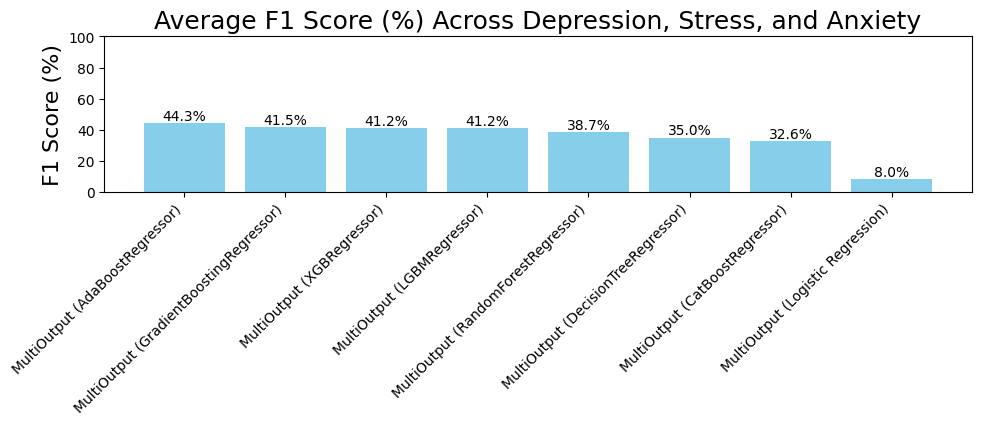

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
bars = plt.bar(avg_metrics['Model'], avg_metrics['F1 Score'], color='skyblue')
plt.title('Average F1 Score (%) Across Depression, Stress, and Anxiety', fontsize=18)
plt.ylabel('F1 Score (%)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 12.2. Accuracy Bar Plot:

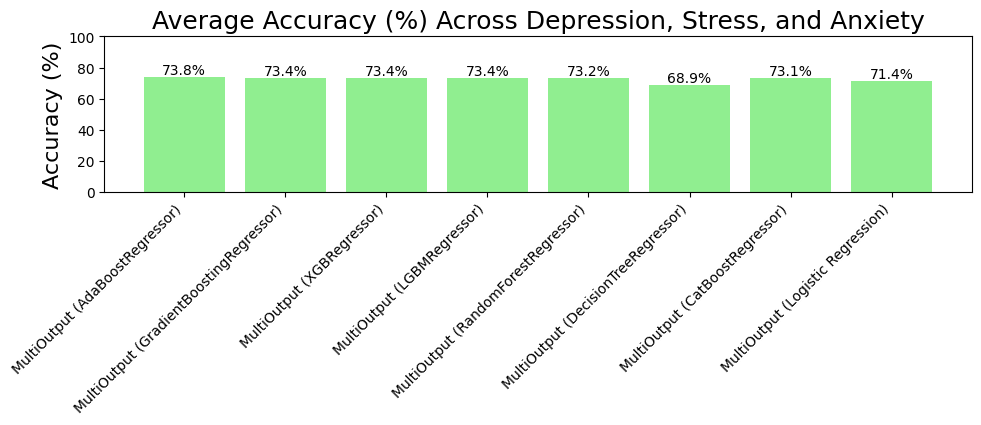

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
bars = plt.bar(avg_metrics['Model'], avg_metrics['Accuracy'], color='lightgreen')
plt.title('Average Accuracy (%) Across Depression, Stress, and Anxiety', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 12.3. AUC Bar Plot:

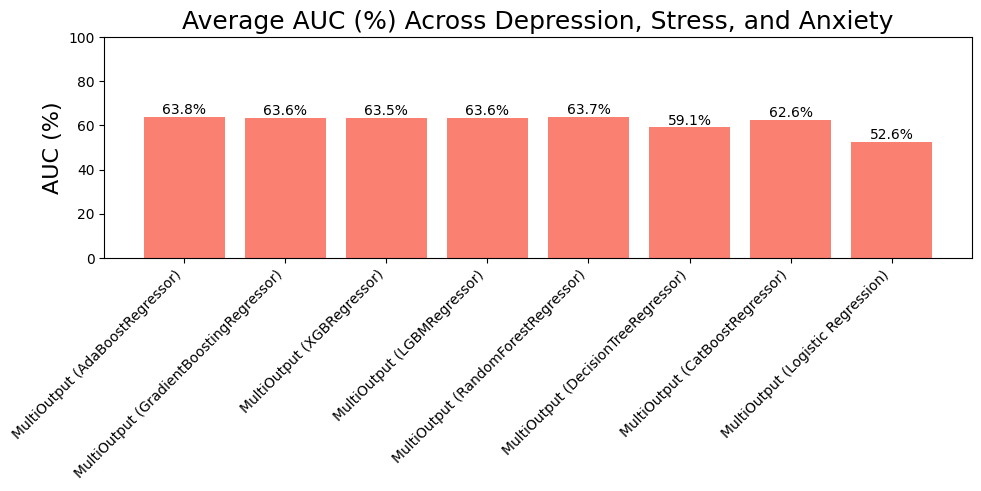

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 3)
bars = plt.bar(avg_metrics['Model'], avg_metrics['AUC'], color='salmon')
plt.title('Average AUC (%) Across Depression, Stress, and Anxiety', fontsize=18)
plt.ylabel('AUC (%)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 13.1. Average Accuracy (%) and K-Fold (%) for each Model

In [ ]:
# Firstly we group and calculate average Accuracy:
accuracy_avg = metrics_df.groupby('Model').apply(
    lambda x: x['Accuracy'].mean() * 100
).reset_index(name='Avg_Accuracy_Percentage')

# Secondly we group and calculate average K-Fold sum:
def calculate_kfold_sum(group):
    kfold_sums = group['K-fold Scores (R2)'].apply(lambda scores: sum(scores))
    return (kfold_sums.mean()) * 100

kfold_avg = metrics_df.groupby('Model').apply(calculate_kfold_sum).reset_index(name='Avg_KFold_Percentage')

# Finally we merge both(First & Second) results:
final_df = pd.merge(accuracy_avg, kfold_avg, on='Model')

# Then we print the final score table:
print("Average Accuracy (%) and K-Fold (%) for each Model:")
print(final_df.to_string(index=False))

Average Accuracy (%) and K-Fold (%) for each Model:
                                  Model  Avg_Accuracy_Percentage  Avg_KFold_Percentage
        MultiOutput (AdaBoostRegressor)                73.840000             77.936667
        MultiOutput (CatBoostRegressor)                73.123333             74.746667
    MultiOutput (DecisionTreeRegressor)                68.883333           -148.470000
MultiOutput (GradientBoostingRegressor)                73.433333             74.636667
            MultiOutput (LGBMRegressor)                73.360000             74.686667
      MultiOutput (Logistic Regression)                71.386667           -458.310000
    MultiOutput (RandomForestRegressor)                73.240000             58.256667
             MultiOutput (XGBRegressor)                73.360000             74.830000


# 13.2. Line Plot: Accuracy vs. K-Fold Accuracy Comparison Across Models

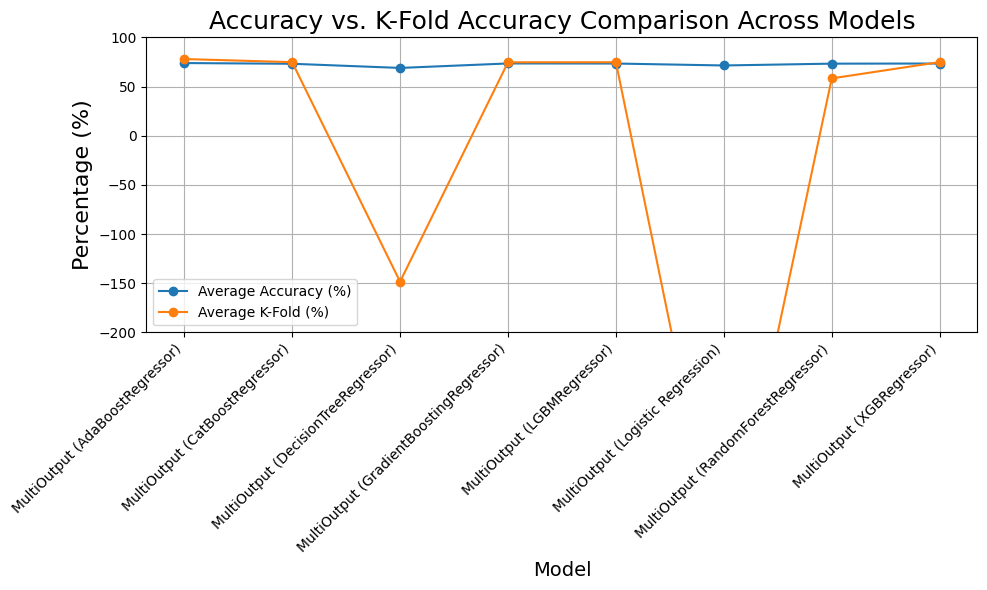

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(final_df['Model'], final_df['Avg_Accuracy_Percentage'], marker='o', label='Average Accuracy (%)')
plt.plot(final_df['Model'], final_df['Avg_KFold_Percentage'], marker='o', label='Average K-Fold (%)')

plt.title('Accuracy vs. K-Fold Accuracy Comparison Across Models', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylim(-200, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 14. Saving the Model, Scaler, and Feature Selector

In [ ]:
from joblib import dump

dump(scaler, 'scaler_Ada.joblib')
dump(selector, 'feature_selector_Ada.joblib')

['feature_selector_Ada.joblib']

In [ ]:
ada_model = models['MultiOutput (AdaBoostRegressor)']
dump(ada_model, 'multioutput_adaboost_model.joblib')

['multioutput_adaboost_model.joblib']

## • Algorithms Used:
###      -> For Preprocessing:
####          · LabelEncoder
####          · StandardScaler

###      -> Feature Selection:
####          · SelectKBest with f_regression

###      ->  Models:
####          · LogisticRegression
####          · RandomForestClassifier
####          · AdaBoostRegressor
####          · XGBRegressor
####          · CatBoostRegressor
####          · DecisionTreeRegressor
####          · GradientBoostingRegressor
####          · LGBMRegressor

## • Additional Notes for our better understanding:

### MultiOutput Models: We uses 'MultiOutputRegressor' and 'MultiOutputClassifier' to handle the multi-target prediction problem (predicting Depression_Score, Stress_Level, and Anxiety_Score simultaneously).

### Grid Search: The use of 'GridSearchCV' indicates a hyperparameter tuning process to optimize the performance of each model.

### Feature Selection: The 'SelectKBest' feature selection helps reduce dimensionality and potentially improve model performance by selecting the most relevant features.

### Scoring Metric: The r2 scoring metric (R-squared) is used to evaluate the performance of the regression models during Grid Search.

# Thankyou from Team 🔟